### explore the data model, or the likelihood use deterministic plankton model (with built-in in ODE solver)

In [1]:
from scipy.integrate import odeint
import numpy as np


def simulate(P, t, γ, λ):
    om = 2.0*np.pi/365.0
    return γ *(1+np.sin(om*t))*P - λ*P**2

In [2]:
def loglike(theta,obs):
    # step 1: run the model given the parameters to get state
    tobs = obs['t']
    yobs = obs['y']
    
    P = 2.5
    xhat = odeint(simulate, P, tobs, args=theta)[:,0]
    
    # step 2: compute the likelihood (compare state to observations)
    return -np.sum((yobs-xhat)**2)

### Generate Synthetic Observations

 * make up some synthetic (~biweekly) observations
 * simulate P, extract every 15th day, add some white noise


In [3]:
T = 365*4
theta = (0.25, 0.1) # γ, λ
P = 2.5
tobs = np.arange(0,T,15)
x = odeint(simulate, P, tobs, args=theta)[:,0]
yobs = x + 0.3 * np.random.normal(size=x.size)

obs = {'t':tobs, 'y':yobs}

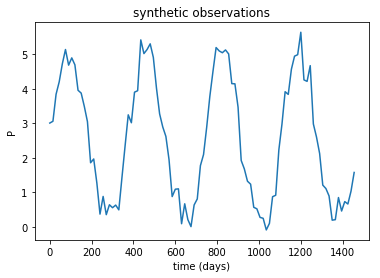

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(tobs, yobs)
ax.set(title='synthetic observations', xlabel='time (days)', ylabel='P')
None

## Likelihood

spot likelihood value: how probable is the set of parameters?

In [5]:
# specify the parameters
theta = (0.2,0.15) # γ, λ

# compute likelihood
L = loglike(theta,obs)
print(L)

-215.01808880957046


## Likelihood Profiles
profile each parameter separately, fix other param at "true" value

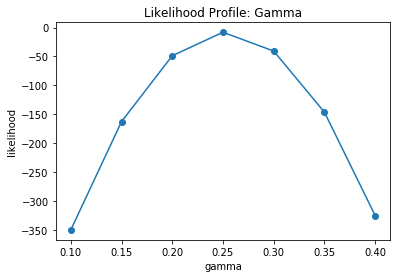

In [6]:
# gamma

gamma_grid = np.arange(0.1,0.45,0.05)
Lgamma = [loglike((g,0.1), obs) for g in gamma_grid]

fig, ax = plt.subplots()
ax.plot(gamma_grid, Lgamma, marker='o')
ax.set(title='Likelihood Profile: Gamma', xlabel='gamma', ylabel='likelihood')
None

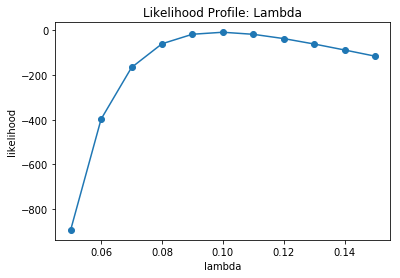

In [7]:
# lambda

lambda_grid = np.arange(0.05,0.16,0.01)
Llambda = [loglike((0.25,l), obs) for l in lambda_grid]

fig, ax = plt.subplots()
ax.plot(lambda_grid, Llambda, marker='o')
ax.set(title='Likelihood Profile: Lambda', xlabel='lambda', ylabel='likelihood')
None

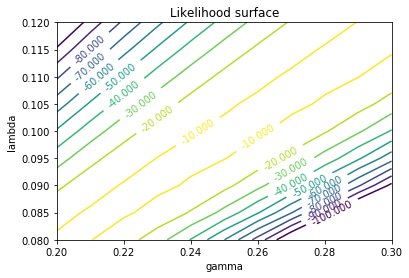

In [8]:
# 2D likelihood

gamma_grid = np.arange(0.2,0.31,0.01)
lambda_grid = np.arange(0.08,0.125,0.005)

Lacc = np.array([[loglike((g,l), obs) for g in gamma_grid] for l in lambda_grid])

fig, ax = plt.subplots()
cs = ax.contour(gamma_grid, lambda_grid, Lacc, levels=np.linspace(-100,0,11))
ax.clabel(cs, fontsize=10)
ax.set(title='Likelihood surface', xlabel='gamma', ylabel='lambda')
None

In [9]:
from scipy.optimize import minimize

loglike_neg = lambda theta: -loglike(tuple(theta), obs)

res = minimize(loglike_neg, (0.25,0.1), method='BFGS', options={'disp':True})
print('solution: γ={theta[0]:.3f}, λ={theta[1]:.3f}'.format(theta=res['x']))

/usr/lib/python3/dist-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/lib/python3/dist-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


         Current function value: 8.061328
         Iterations: 8
         Function evaluations: 341
         Gradient evaluations: 81
solution: γ=0.272, λ=0.108
